In [1]:
import torch
from torch.utils.data import DataLoader
import torch.nn as nn

from utils.dataset import FlowersDataset, get_test_transforms
from augmentation.advanced_aug import get_baseline_transforms, get_advanced_transforms
from models.transfer_models import get_resnet18
from training.train_transfer import train_transfer


In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [3]:
# no aug n regularization
train_ds = FlowersDataset("../data/processed/train", transform=get_test_transforms())
val_ds = FlowersDataset("../data/processed/val", transform=get_test_transforms())

train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=32)

model_no_aug = get_resnet18(num_classes=5, feature_extract=False).to(device)

criterion = nn.CrossEntropyLoss()

history_no_aug = train_transfer(
    model_no_aug,
    train_loader,
    val_loader,
    device,
    epochs=10,
    lr_backbone=1e-5,
    lr_head=1e-3,
    weight_decay=0,
    save_path="../checkpoints/resnet_no_aug.pth"
)


C:\Users\furenzoku\Desktop\uni\python for deep\module-2\.venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\furenzoku\Desktop\uni\python for deep\module-2\.venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)



Epoch 1/10


Validation: 100%|██████████| 21/21 [00:03<00:00,  5.54it/s]


Train Loss: 0.8487 | Train Acc: 0.6903
Val Loss:   0.5113 | Val Acc:   0.8152
Найкраща модель збережена

Epoch 2/10


Validation: 100%|██████████| 21/21 [00:03<00:00,  6.26it/s]


Train Loss: 0.4060 | Train Acc: 0.8615
Val Loss:   0.4203 | Val Acc:   0.8571
Найкраща модель збережена

Epoch 3/10


Validation: 100%|██████████| 21/21 [00:03<00:00,  6.46it/s]


Train Loss: 0.2805 | Train Acc: 0.9036
Val Loss:   0.3774 | Val Acc:   0.8711
Найкраща модель збережена

Epoch 4/10


Validation: 100%|██████████| 21/21 [00:03<00:00,  6.33it/s]


Train Loss: 0.1902 | Train Acc: 0.9417
Val Loss:   0.3734 | Val Acc:   0.8618
Найкраща модель збережена

Epoch 5/10


Validation: 100%|██████████| 21/21 [00:03<00:00,  6.44it/s]


Train Loss: 0.1210 | Train Acc: 0.9639
Val Loss:   0.3465 | Val Acc:   0.8773
Найкраща модель збережена

Epoch 6/10


Validation: 100%|██████████| 21/21 [00:03<00:00,  6.27it/s]


Train Loss: 0.0834 | Train Acc: 0.9805
Val Loss:   0.3715 | Val Acc:   0.8789

Epoch 7/10


Validation: 100%|██████████| 21/21 [00:03<00:00,  6.36it/s]


Train Loss: 0.0664 | Train Acc: 0.9848
Val Loss:   0.3760 | Val Acc:   0.8820

Epoch 8/10


Validation: 100%|██████████| 21/21 [00:03<00:00,  6.50it/s]


Train Loss: 0.0474 | Train Acc: 0.9911
Val Loss:   0.3680 | Val Acc:   0.8898

Epoch 9/10


Validation: 100%|██████████| 21/21 [00:03<00:00,  6.01it/s]


Train Loss: 0.0348 | Train Acc: 0.9944
Val Loss:   0.4053 | Val Acc:   0.8727

Epoch 10/10


Validation: 100%|██████████| 21/21 [00:03<00:00,  6.03it/s]

Train Loss: 0.0268 | Train Acc: 0.9957
Val Loss:   0.3772 | Val Acc:   0.8851
early stopping


In [4]:
# baseline aug
train_ds = FlowersDataset("../data/processed/train", transform=get_baseline_transforms())
val_ds = FlowersDataset("../data/processed/val", transform=get_test_transforms())

train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=32)

model_baseline_aug = get_resnet18(num_classes=5, feature_extract=False).to(device)

history_baseline_aug = train_transfer(
    model_baseline_aug,
    train_loader,
    val_loader,
    device,
    epochs=10,
    lr_backbone=1e-5,
    lr_head=1e-3,
    weight_decay=1e-5,
    save_path="../checkpoints/resnet_baseline_aug.pth"
)


Epoch 1/10


Validation: 100%|██████████| 21/21 [00:03<00:00,  6.29it/s]


Train Loss: 0.9523 | Train Acc: 0.6204
Val Loss:   0.5738 | Val Acc:   0.8137
Найкраща модель збережена

Epoch 2/10


Validation: 100%|██████████| 21/21 [00:03<00:00,  6.42it/s]


Train Loss: 0.5299 | Train Acc: 0.8076
Val Loss:   0.4863 | Val Acc:   0.8385
Найкраща модель збережена

Epoch 3/10


Validation: 100%|██████████| 21/21 [00:03<00:00,  5.81it/s]


Train Loss: 0.4366 | Train Acc: 0.8420
Val Loss:   0.4105 | Val Acc:   0.8540
Найкраща модель збережена

Epoch 4/10


Validation: 100%|██████████| 21/21 [00:03<00:00,  5.61it/s]


Train Loss: 0.3570 | Train Acc: 0.8708
Val Loss:   0.3905 | Val Acc:   0.8556
Найкраща модель збережена

Epoch 5/10


Validation: 100%|██████████| 21/21 [00:03<00:00,  5.61it/s]


Train Loss: 0.2748 | Train Acc: 0.9039
Val Loss:   0.3768 | Val Acc:   0.8758
Найкраща модель збережена

Epoch 6/10


Validation: 100%|██████████| 21/21 [00:03<00:00,  5.90it/s]


Train Loss: 0.2628 | Train Acc: 0.9013
Val Loss:   0.3620 | Val Acc:   0.8773
Найкраща модель збережена

Epoch 7/10


Validation: 100%|██████████| 21/21 [00:03<00:00,  5.51it/s]


Train Loss: 0.2296 | Train Acc: 0.9179
Val Loss:   0.3531 | Val Acc:   0.8727
Найкраща модель збережена

Epoch 8/10


Validation: 100%|██████████| 21/21 [00:03<00:00,  5.92it/s]


Train Loss: 0.2153 | Train Acc: 0.9245
Val Loss:   0.3665 | Val Acc:   0.8727

Epoch 9/10


Validation: 100%|██████████| 21/21 [00:03<00:00,  6.47it/s]


Train Loss: 0.1615 | Train Acc: 0.9440
Val Loss:   0.3438 | Val Acc:   0.8913
Найкраща модель збережена

Epoch 10/10


Validation: 100%|██████████| 21/21 [00:03<00:00,  6.36it/s]

Train Loss: 0.1461 | Train Acc: 0.9513
Val Loss:   0.3666 | Val Acc:   0.8742


In [5]:
# adv augmentation
train_ds = FlowersDataset("../data/processed/train", transform=get_advanced_transforms())
val_ds = FlowersDataset("../data/processed/val", transform=get_test_transforms())

train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=32)

model_advanced_aug = get_resnet18(num_classes=5, feature_extract=False).to(device)

history_adv_aug = train_transfer(
    model_advanced_aug,
    train_loader,
    val_loader,
    device,
    epochs=10,
    lr_backbone=1e-5,
    lr_head=1e-3,
    weight_decay=1e-4,
    save_path="../checkpoints/resnet_advanced_aug.pth"
)



Epoch 1/10


Validation: 100%|██████████| 21/21 [00:03<00:00,  6.44it/s]


Train Loss: 1.1511 | Train Acc: 0.5280
Val Loss:   0.7146 | Val Acc:   0.7314
Найкраща модель збережена

Epoch 2/10


Validation: 100%|██████████| 21/21 [00:03<00:00,  6.20it/s]


Train Loss: 0.7737 | Train Acc: 0.6979
Val Loss:   0.5802 | Val Acc:   0.7811
Найкраща модель збережена

Epoch 3/10


Validation: 100%|██████████| 21/21 [00:03<00:00,  6.55it/s]


Train Loss: 0.7046 | Train Acc: 0.7357
Val Loss:   0.4711 | Val Acc:   0.8075
Найкраща модель збережена

Epoch 4/10


Validation: 100%|██████████| 21/21 [00:03<00:00,  6.31it/s]


Train Loss: 0.6338 | Train Acc: 0.7615
Val Loss:   0.4329 | Val Acc:   0.8323
Найкраща модель збережена

Epoch 5/10


Validation: 100%|██████████| 21/21 [00:03<00:00,  6.57it/s]


Train Loss: 0.5959 | Train Acc: 0.7718
Val Loss:   0.4427 | Val Acc:   0.8199

Epoch 6/10


Validation: 100%|██████████| 21/21 [00:03<00:00,  6.51it/s]


Train Loss: 0.5748 | Train Acc: 0.7797
Val Loss:   0.4299 | Val Acc:   0.8307
Найкраща модель збережена

Epoch 7/10


Validation: 100%|██████████| 21/21 [00:03<00:00,  6.41it/s]


Train Loss: 0.5580 | Train Acc: 0.7883
Val Loss:   0.4229 | Val Acc:   0.8339
Найкраща модель збережена

Epoch 8/10


Validation: 100%|██████████| 21/21 [00:03<00:00,  6.32it/s]


Train Loss: 0.5171 | Train Acc: 0.8029
Val Loss:   0.4286 | Val Acc:   0.8307

Epoch 9/10


Validation: 100%|██████████| 21/21 [00:04<00:00,  4.57it/s]


Train Loss: 0.5047 | Train Acc: 0.8023
Val Loss:   0.3936 | Val Acc:   0.8509
Найкраща модель збережена

Epoch 10/10


Validation: 100%|██████████| 21/21 [00:03<00:00,  6.51it/s]


Train Loss: 0.5004 | Train Acc: 0.8076
Val Loss:   0.3762 | Val Acc:   0.8525
Найкраща модель збережена


In [7]:
# Regularization (adv aug and dropout and l2)
import torch.nn as nn

model_reg = get_resnet18(num_classes=5, feature_extract=False)

# додаємо dropout у classifier
model_reg.fc = nn.Sequential(
    nn.Dropout(0.4),
    nn.Linear(model_reg.fc.in_features, 5)
)

model_reg = model_reg.to(device)

history_reg = train_transfer(
    model_reg,
    train_loader,
    val_loader,
    device,
    epochs=10,
    lr_backbone=1e-5,
    lr_head=1e-3,
    weight_decay=5e-4,       # L2 регуляризація
    save_path="../checkpoints/resnet_regularized.pth"
)



Epoch 1/10


Validation: 100%|██████████| 21/21 [00:03<00:00,  6.54it/s]


Train Loss: 1.3112 | Train Acc: 0.4614
Val Loss:   0.7335 | Val Acc:   0.7469
Найкраща модель збережена

Epoch 2/10


Validation: 100%|██████████| 21/21 [00:03<00:00,  6.58it/s]


Train Loss: 0.9128 | Train Acc: 0.6353
Val Loss:   0.5694 | Val Acc:   0.7904
Найкраща модель збережена

Epoch 3/10


Validation: 100%|██████████| 21/21 [00:03<00:00,  6.54it/s]


Train Loss: 0.8376 | Train Acc: 0.6794
Val Loss:   0.5575 | Val Acc:   0.7904
Найкраща модель збережена

Epoch 4/10


Validation: 100%|██████████| 21/21 [00:03<00:00,  6.68it/s]


Train Loss: 0.7604 | Train Acc: 0.7055
Val Loss:   0.5385 | Val Acc:   0.7795
Найкраща модель збережена

Epoch 5/10


Validation: 100%|██████████| 21/21 [00:03<00:00,  6.41it/s]


Train Loss: 0.6979 | Train Acc: 0.7254
Val Loss:   0.4744 | Val Acc:   0.8106
Найкраща модель збережена

Epoch 6/10


Validation: 100%|██████████| 21/21 [00:03<00:00,  6.71it/s]


Train Loss: 0.6829 | Train Acc: 0.7337
Val Loss:   0.4840 | Val Acc:   0.8121

Epoch 7/10


Validation: 100%|██████████| 21/21 [00:03<00:00,  6.50it/s]


Train Loss: 0.6455 | Train Acc: 0.7512
Val Loss:   0.4049 | Val Acc:   0.8401
Найкраща модель збережена

Epoch 8/10


Validation: 100%|██████████| 21/21 [00:03<00:00,  6.67it/s]


Train Loss: 0.6228 | Train Acc: 0.7658
Val Loss:   0.4351 | Val Acc:   0.8370

Epoch 9/10


Validation: 100%|██████████| 21/21 [00:03<00:00,  6.80it/s]


Train Loss: 0.5924 | Train Acc: 0.7734
Val Loss:   0.4075 | Val Acc:   0.8385

Epoch 10/10


Validation: 100%|██████████| 21/21 [00:03<00:00,  6.54it/s]


Train Loss: 0.5842 | Train Acc: 0.7844
Val Loss:   0.3633 | Val Acc:   0.8618
Найкраща модель збережена


In [9]:
# regularization + label smoothing
criterion_ls = nn.CrossEntropyLoss(label_smoothing=0.1)

model_ls = get_resnet18(num_classes=5, feature_extract=False)
model_ls.fc = nn.Sequential(
    nn.Dropout(0.4),
    nn.Linear(model_ls.fc.in_features, 5)
)
model_ls = model_ls.to(device)

history_ls = train_transfer(
    model_ls,
    train_loader,
    val_loader,
    device,
    epochs=10,
    lr_backbone=1e-5,
    lr_head=1e-3,
    weight_decay=5e-4,
    save_path="../checkpoints/resnet_label_smoothing.pth"
)



Epoch 1/10


Validation: 100%|██████████| 21/21 [00:03<00:00,  6.29it/s]


Train Loss: 1.3224 | Train Acc: 0.4660
Val Loss:   0.7559 | Val Acc:   0.7252
Найкраща модель збережена

Epoch 2/10


Validation: 100%|██████████| 21/21 [00:04<00:00,  4.66it/s]


Train Loss: 0.9194 | Train Acc: 0.6486
Val Loss:   0.5946 | Val Acc:   0.7780
Найкраща модель збережена

Epoch 3/10


Validation: 100%|██████████| 21/21 [00:04<00:00,  4.84it/s]


Train Loss: 0.7928 | Train Acc: 0.6992
Val Loss:   0.5016 | Val Acc:   0.8090
Найкраща модель збережена

Epoch 4/10


Validation: 100%|██████████| 21/21 [00:04<00:00,  4.84it/s]


Train Loss: 0.7487 | Train Acc: 0.7201
Val Loss:   0.5573 | Val Acc:   0.7748

Epoch 5/10


Validation: 100%|██████████| 21/21 [00:04<00:00,  4.65it/s]


Train Loss: 0.7414 | Train Acc: 0.7141
Val Loss:   0.4775 | Val Acc:   0.8152
Найкраща модель збережена

Epoch 6/10


Validation: 100%|██████████| 21/21 [00:03<00:00,  6.37it/s]


Train Loss: 0.6739 | Train Acc: 0.7466
Val Loss:   0.4342 | Val Acc:   0.8276
Найкраща модель збережена

Epoch 7/10


Validation: 100%|██████████| 21/21 [00:04<00:00,  4.84it/s]


Train Loss: 0.6442 | Train Acc: 0.7555
Val Loss:   0.4025 | Val Acc:   0.8323
Найкраща модель збережена

Epoch 8/10


Validation: 100%|██████████| 21/21 [00:04<00:00,  4.91it/s]


Train Loss: 0.5989 | Train Acc: 0.7671
Val Loss:   0.4066 | Val Acc:   0.8385

Epoch 9/10


Validation: 100%|██████████| 21/21 [00:04<00:00,  4.85it/s]


Train Loss: 0.5867 | Train Acc: 0.7754
Val Loss:   0.3871 | Val Acc:   0.8447
Найкраща модель збережена

Epoch 10/10


Validation: 100%|██████████| 21/21 [00:03<00:00,  5.29it/s]

Train Loss: 0.5942 | Train Acc: 0.7734
Val Loss:   0.3945 | Val Acc:   0.8494


### графіки

In [10]:
import matplotlib.pyplot as plt

def plot_history(history, title):
    plt.figure(figsize=(12,5))

    plt.subplot(1,2,1)
    plt.plot(history["train_loss"])
    plt.plot(history["val_loss"])
    plt.title(title + " — Loss")
    plt.legend(["Train", "Val"])

    plt.subplot(1,2,2)
    plt.plot(history["train_acc"])
    plt.plot(history["val_acc"])
    plt.title(title + " — Accuracy")
    plt.legend(["Train", "Val"])

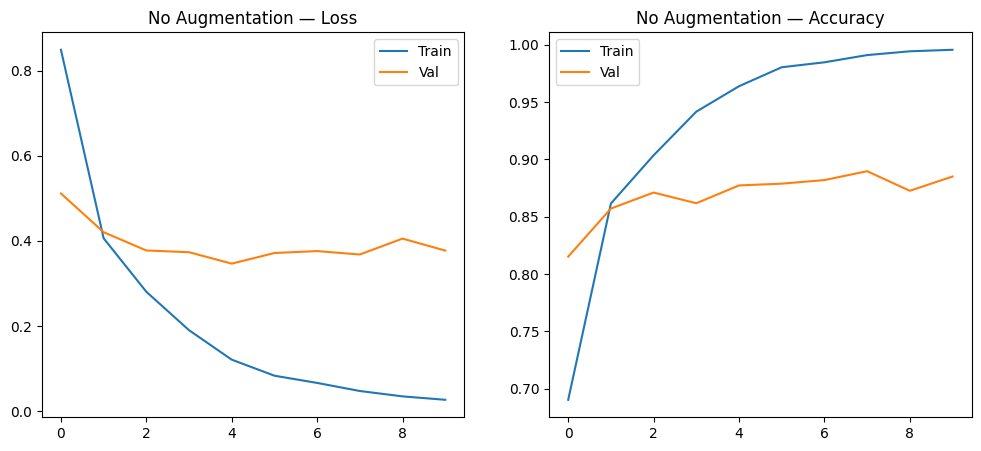

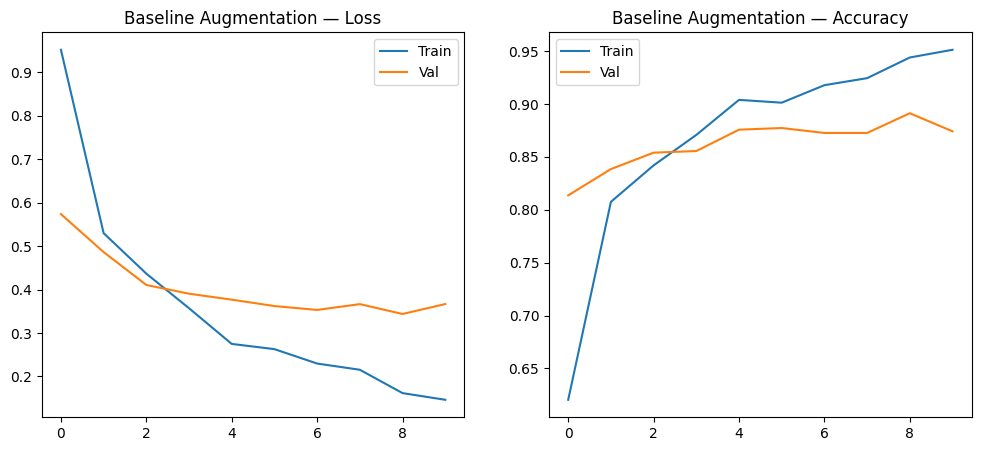

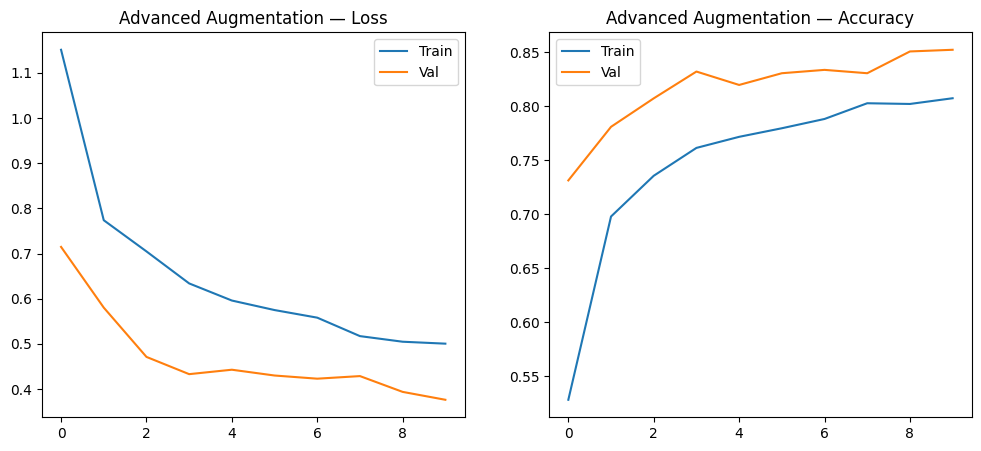

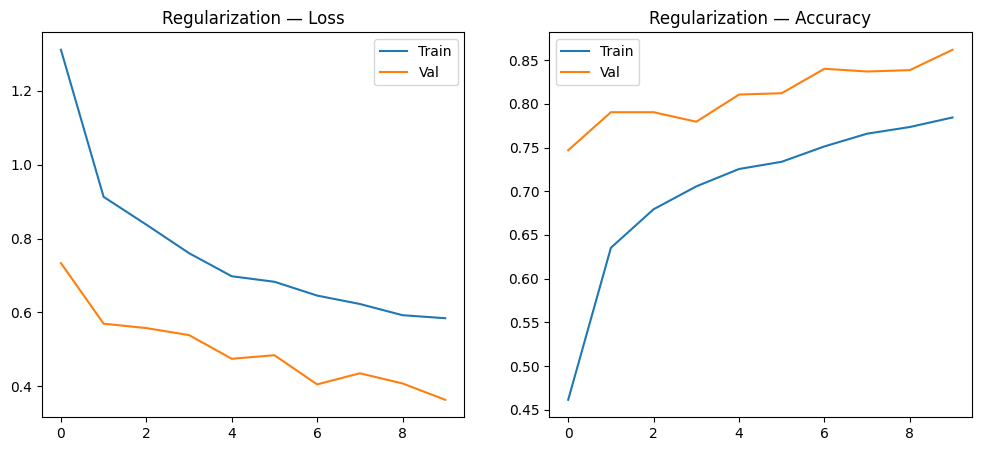

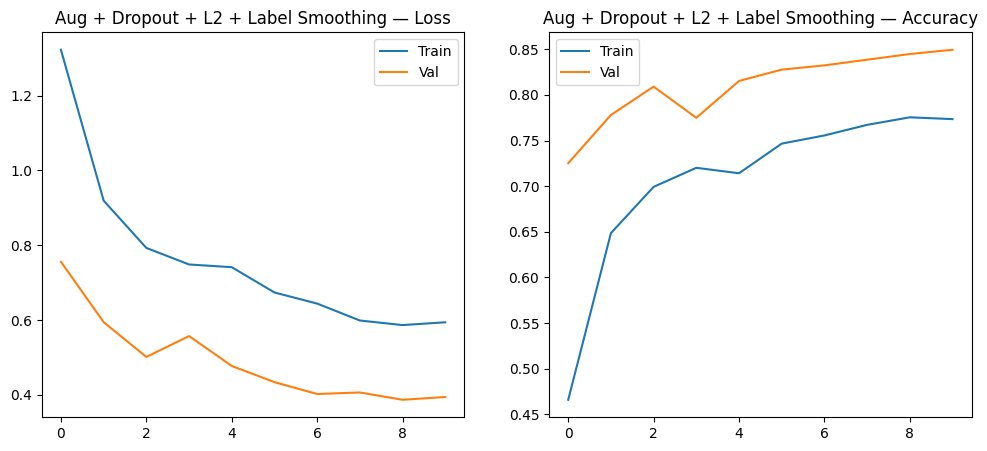

In [11]:
plot_history(history_no_aug, "No Augmentation")
plt.savefig("../results/no_augmentation.png", dpi=300)
plt.show()

plot_history(history_baseline_aug, "Baseline Augmentation")
plt.savefig("../results/baseline_augmentation.png", dpi=300)
plt.show()

plot_history(history_adv_aug, "Advanced Augmentation")
plt.savefig("../results/adv_augmentation.png", dpi=300)
plt.show()

plot_history(history_reg, "Regularization")
plt.savefig("../results/regularization_curve.png", dpi=300)
plt.show()

plot_history(history_ls, "Aug + Dropout + L2 + Label Smoothing")
plt.savefig("../results/label_smoothing.png", dpi=300)
plt.show()